In [1]:
#import important libraries 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#read the dataset
df = pd.read_csv('Sales_and_Satisfaction.csv')
#preview 8 randomly selected columns
df.sample(8)

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
7352,Treatment,High Value,148.485680,255.944922,79.447308,76.382616,Yes
6867,Treatment,Medium Value,185.036410,214.524141,93.885454,108.959546,Yes
5883,Treatment,Low Value,206.216524,254.755682,87.686308,101.333884,Yes
1022,Treatment,Low Value,216.467178,256.152466,75.550744,74.105524,No
1853,Control,Low Value,204.886769,295.434343,78.294180,77.377101,No
9478,Treatment,Low Value,158.079135,122.996162,67.507570,67.161479,Yes
4713,Control,High Value,222.824414,236.563120,73.597758,74.308695,No
7511,Treatment,Medium Value,198.568481,182.407343,76.921083,103.760706,No


In [9]:
#check for missing values in all columns
df.isna().sum()

Group                           0
Customer_Segment                0
Sales_Before                    0
Sales_After                     0
Customer_Satisfaction_Before    0
Customer_Satisfaction_After     0
Purchase_Made                   0
dtype: int64

In [10]:
#The dataset contains 2 groups in an experiment; the control group that has no intervention and the treatment group that has undergone intervention, purhase made is after intervention
#With this data we can check whether the intervention was helpfulor detrimental to sales and customer satisfaction.
#are purchases affected by customer satisfaction; whe customer satisfaction is higher in after was a purchase made
#does purchase made rely on group; was a purchase made regardless of the group they were in
#Does customer segment determine the outcome  of any afters
##To perform all of the above, we'll need to first identify the differences in After and before in 2 seperate new rows Sales_difference and Customer_difference

In [13]:
df['Sales_difference'] = df['Sales_After'] - df['Sales_Before']
df['Customer_difference']= df['Customer_Satisfaction_After'] - df['Customer_Satisfaction_Before']

In [14]:
df.sample(5)

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made,Sales_difference,Customer_difference
6979,Treatment,Medium Value,184.809260,148.290318,51.306770,75.149210,No,-36.518942,23.842440
1980,Control,Medium Value,214.085894,188.081046,81.863452,78.862838,No,-26.004849,-3.000614
9448,Control,Medium Value,156.579971,196.982639,82.177085,76.781107,Yes,40.402668,-5.395978
9907,Treatment,Medium Value,178.358612,259.325152,78.813872,69.977930,No,80.966541,-8.835942
2681,Control,Medium Value,158.770280,252.582872,79.861515,90.399168,Yes,93.812592,10.537653


In [32]:
columns = ['Sales_Before', 'Sales_After', 'Customer_Satisfaction_Before', 'Customer_Satisfaction_After', 'Sales_difference', 'Customer_difference']
selected_df = df[columns]
correlation_matrix = selected_df.corr()
print(correlation_matrix)

                              Sales_Before  Sales_After  \
Sales_Before                      1.000000     0.711068   
Sales_After                       0.711068     1.000000   
Customer_Satisfaction_Before     -0.005231    -0.001584   
Customer_Satisfaction_After       0.001638     0.005895   
Sales_difference                  0.013591     0.712722   
Customer_difference               0.007491     0.009869   

                              Customer_Satisfaction_Before  \
Sales_Before                                     -0.005231   
Sales_After                                      -0.001584   
Customer_Satisfaction_Before                      1.000000   
Customer_Satisfaction_After                       0.703854   
Sales_difference                                  0.002966   
Customer_difference                              -0.000423   

                              Customer_Satisfaction_After  Sales_difference  \
Sales_Before                                     0.001638          0.013

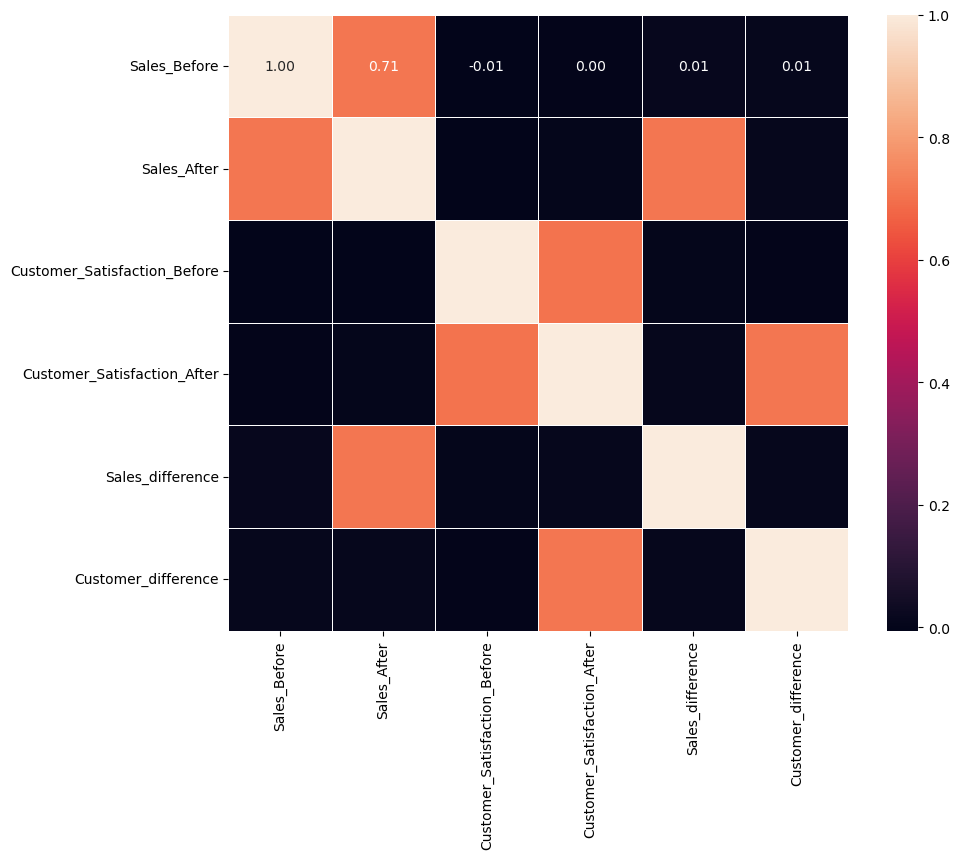

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot = True, fmt= '.2f', linewidths=.5)
plt.show()

In [35]:
#rating customer satisfaction and rate according to their difference results; when -ve its bad, when +ve its good
def assign_rate(Sales_difference):
    if Sales_difference < 0:
        return 'bad'
    else:
        return 'good'

def assign_rate1(Customer_difference):
    if Customer_difference < 0:
        return 'bad'
    else:
        return 'good'
df['Sales_rate'] = df['Sales_difference'].apply(lambda x: assign_rate(x))
df['Customer_rate'] = df['Customer_difference'].apply(lambda x : assign_rate1(x))

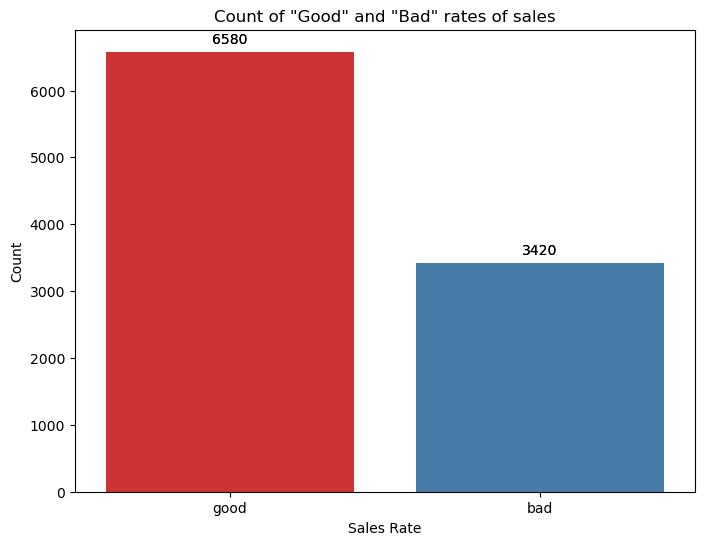

In [39]:
#Visualize the bad and good for sales
plt.figure(figsize=(8, 6))
sns.countplot(x='Sales_rate', data=df, palette='Set1')
ax = sns.countplot(x='Sales_rate', data=df, palette='Set1')
# Add labels inside the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.title('Count of "Good" and "Bad" rates of sales')
plt.xlabel('Sales Rate')
plt.ylabel('Count')
plt.show()

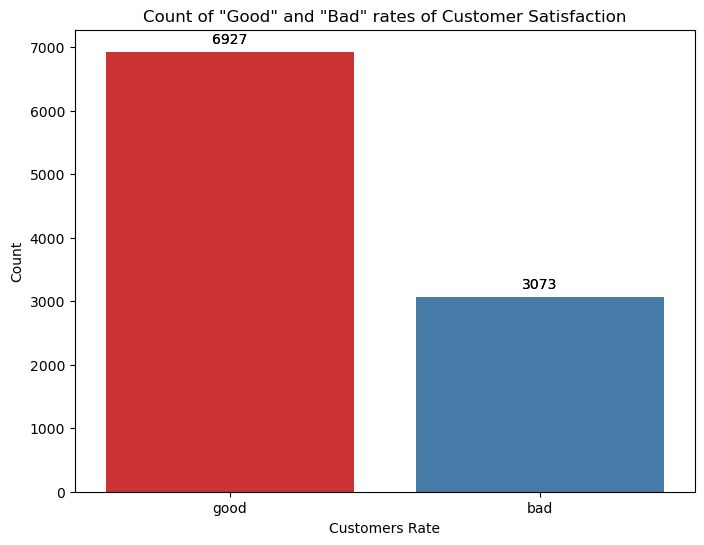

In [40]:
#Visualize the bad and good for customer satisfaction
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer_rate', data=df, palette='Set1')
ax1 = sns.countplot(x='Customer_rate', data=df, palette='Set1')
# Add labels inside the bars
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.title('Count of "Good" and "Bad" rates of Customer Satisfaction')
plt.xlabel('Customers Rate')
plt.ylabel('Count')
plt.show()

In [44]:
#Check for independence within the following pairs (Group, Purchase_Made),(Group, Sales_rate) ,(Customer_Satisfaction_After,Purchase_Made),
#(Customer_rate, Purchase_Made), (Customer_Satisfaction_Before, Sales_After)
#Chi square test of independence for pairs
#H0: Independence
#HA: Dependence
from scipy.stats import chi2_contingency
pairs = [('Group', 'Purchase_Made'),('Group', 'Sales_rate') ,('Customer_Satisfaction_After','Purchase_Made'),('Customer_Satisfaction_Before','Purchase_Made'), ('Customer_rate', 'Purchase_Made'), ('Customer_Satisfaction_Before', 'Sales_After')]
for var1, var2 in pairs:
    contingency_table = pd.crosstab(df[var1], df[var2])
    _, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for Independence between '{var1}' and '{var2}':")
    print(f"P-value: {p_value}")
    print("")

Chi-Square Test for Independence between 'Group' and 'Purchase_Made':
P-value: 0.644427496145584

Chi-Square Test for Independence between 'Group' and 'Sales_rate':
P-value: 0.35483394734416185

Chi-Square Test for Independence between 'Customer_Satisfaction_After' and 'Purchase_Made':
P-value: 0.4952983945386835

Chi-Square Test for Independence between 'Customer_Satisfaction_Before' and 'Purchase_Made':
P-value: 0.4952983945386835

Chi-Square Test for Independence between 'Customer_rate' and 'Purchase_Made':
P-value: 0.10957611586292487

Chi-Square Test for Independence between 'Customer_Satisfaction_Before' and 'Sales_After':
P-value: 0.23974273722409054



In [46]:
#fail to reject null hypothesis for all since all p-values are > 0.05

In [45]:
#export clean data for visualization
df.to_csv('SalesExperiment.csv', index = False)